In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
book = pd.read_csv('/content/drive/MyDrive/Book_data/BX-Books.csv' , delimiter =';' , error_bad_lines=False , encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [ ]:
user = pd.read_csv('/content/drive/MyDrive/Book_data/BX-Users.csv' , error_bad_lines=False , delimiter= ';' , encoding='latin-1')

In [ ]:
rating = pd.read_csv('/content/drive/MyDrive/Book_data/BX-Book-Ratings.csv' ,delimiter=';', error_bad_lines= False , encoding ='latin-1')

In [ ]:
book.shape

(271360, 8)

In [ ]:
user.shape

(278858, 3)

In [ ]:
rating.shape

(1149780, 3)

In [ ]:
user.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
rating.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
combine_book_data= pd.merge(rating , user , on='User-ID')

In [ ]:
combine_book_data = pd.merge(combine_book_data , book , on= 'ISBN')

In [ ]:
combine_book_data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [ ]:
column= ['Image-URL-S' , 'Image-URL-M', 'Image-URL-L' ]
combine_book_data= combine_book_data.drop(column , axis=1)

In [ ]:
combine_book_data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [ ]:
round(combine_book_data.isnull().sum() / len(combine_book_data) * 100, 4)

User-ID                 0.0000
ISBN                    0.0000
Book-Rating             0.0000
Location                0.0000
Age                    26.9446
Book-Title              0.0000
Book-Author             0.0001
Year-Of-Publication     0.0000
Publisher               0.0002
dtype: float64

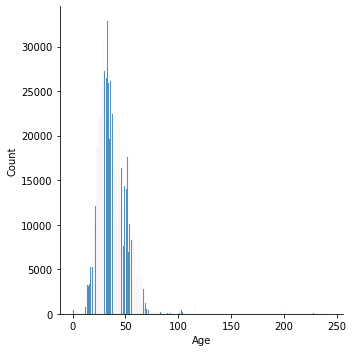

In [ ]:
sns.displot(combine_book_data['Age'] )

In [ ]:
combine_book_data['Year-Of-Publication'] = pd.to_numeric(combine_book_data['Year-Of-Publication'] , errors='coerce').fillna(2099, downcast = 'infer')

In [ ]:
combine_book_data['Book-Rating'] = combine_book_data['Book-Rating'].replace(0, None)

In [ ]:
combine_book_data['Age'] = np.where(combine_book_data['Age']>90, None, combine_book_data['Age'])

In [ ]:
combine_book_data[['Publisher' ,  'Book-Author']]= combine_book_data[['Publisher',  'Book-Author']].fillna('Unknown')

In [ ]:
median = combine_book_data["Age"].median()
std = combine_book_data["Age"].std()
is_null = combine_book_data["Age"].isnull().sum()
rand_age = np.random.randint(median - std, median + std, size = is_null)
age_slice = combine_book_data["Age"].copy()
age_slice[pd.isnull(age_slice)] = rand_age
combine_book_data["Age"] = age_slice
combine_book_data["Age"] = combine_book_data["Age"].astype(int)

In [ ]:
combine_book_data['Country'] = combine_book_data['Location'].apply(lambda row: str(row).split(',')[-1])

In [ ]:
combine_book_data['Country'].head()

0     usa
1     usa
2     usa
3     usa
4     usa
Name: Country, dtype: object

In [ ]:
combine_book_data = combine_book_data.drop('Location', axis=1)

In [ ]:
count_user = combine_book_data['User-ID'].value_counts()
combine_book_data= combine_book_data[combine_book_data['User-ID'].isin(count_user[count_user>=200].index)]
count_book_rat = combine_book_data['Book-Rating'].value_counts()
combine_book_data= combine_book_data[combine_book_data['Book-Rating'].isin(count_book_rat[count_book_rat>=100].index)]

In [ ]:
combine_book_data.shape

(475007, 9)

In [ ]:
combine_book_data = combine_book_data.dropna(axis=0 , subset=['Book-Title'])

rating_count= combine_book_data.groupby('Book-Title')['Book-Rating'].count()
rating_count.reset_index().rename(columns={'Book-Rating':'Rating-Count'}) [['Book-Title' , 'Rating-Count']]


,Book-Title,Rating-Count
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
156132,Ã?Â?ber das Fernsehen.,2
156133,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
156134,Ã?Â?lpiraten.,1
156135,Ã?Â?stlich der Berge.,1


In [ ]:
combine_book_data.head()

,User-ID,ISBN,Book-Rating,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Country
2,6543,034545104X,5,34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
5,23768,034545104X,9,45,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
7,28523,034545104X,9,24,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
15,77940,034545104X,8,25,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,malaysia
16,81977,034545104X,8,34,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa


In [ ]:
c= ['Book-Author','Year-Of-Publication','Publisher','Age','Country']
combine_book_data= combine_book_data.drop(c , axis=1)

In [ ]:
df=combine_book_data.merge(rating_count,on = 'Book-Title' ,how='inner')

In [ ]:
df.head()

,User-ID,ISBN,Book-Rating_x,Book-Title,Rating_Count
0,6543,034545104X,5,Flesh Tones: A Novel,15
1,23768,034545104X,9,Flesh Tones: A Novel,15
2,28523,034545104X,9,Flesh Tones: A Novel,15
3,77940,034545104X,8,Flesh Tones: A Novel,15
4,81977,034545104X,8,Flesh Tones: A Novel,15


In [ ]:
df.rename(columns={'Rating-Count':'Rating_Count'}, inplace=True)

In [ ]:
final_data=df.query('Rating_Count >= @threshold')

In [ ]:
final_data.head()

,User-ID,ISBN,Book-Rating_x,Book-Title,Rating_Count
15,278418,0446520802,5,The Notebook,239
16,3363,0446520802,5,The Notebook,239
17,7158,0446520802,10,The Notebook,239
18,11676,0446520802,10,The Notebook,239
19,23768,0446520802,6,The Notebook,239


In [ ]:
final_data.shape

(58823, 5)

In [ ]:
from scipy.sparse import csr_matrix
final_data=final_data.drop_duplicates(['User-ID','Book-Title'])
df_p = final_data.pivot_table(index='Book-Title', columns='User-ID', values='Rating_Count').fillna(0)
fd_m= csr_matrix(df_p.values)

In [ ]:
df_p.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,...,263460,263877,264031,264082,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,267635,268030,268032,268110,268330,268622,268932,269566,269719,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,71.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,160.0,0.0,...,160.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,0.0,0.0,123.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,70.0,0.0,70.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,114.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,114.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,114.0,114.0,114.0,0.0,0.0,0.0,0.0,114.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine' , algorithm='brute')
model_knn.fit(fd_m)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index= np.random.choice(df_p.shape[0])

In [ ]:
print(query_index)

160


In [ ]:
dist,ind = model_knn.kneighbors(df_p.iloc[query_index,:].values.reshape(1,-1) , n_neighbors=11)

In [ ]:
df_p.index[query_index]

"Drowning Ruth (Oprah's Book Club)"

In [ ]:
for i in range(0 ,len(dist.flatten())):
  if i==0:
    print('Recommendation for{0}: '.format(df_p.index[query_index]))
  else:
    print('{0}: {1}, with distances of {2}:'.format(i,df_p.index[ind.flatten()[i]], dist.flatten()[i]))

Recommendation forDrowning Ruth (Oprah's Book Club): 
1: Icy Sparks, with distances of 0.6170261210243222:
2: Midwives: A Novel, with distances of 0.6333898850303048:
3: While I Was Gone, with distances of 0.6460575427712623:
4: Black and Blue, with distances of 0.6471718478947115:
5: The Book of Ruth (Oprah's Book Club (Paperback)), with distances of 0.6522391771974159:
6: The Pilot's Wife : A Novel, with distances of 0.6542609088840501:
7: Where the Heart Is (Oprah's Book Club (Paperback)), with distances of 0.6659843049835767:
8: Little Altars Everywhere: A Novel, with distances of 0.6776615115575269:
9: The Lovely Bones: A Novel, with distances of 0.6920914026943905:
10: The Rapture of Canaan, with distances of 0.6962554196194435:
